In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('collocations', overwrite=True)
from collocations import urn_coll, collocation
from numpy import log

Updated file `D:\Documents\GitHub\HeCore\collocations.py`

In [2]:
import pandas as pd

In [3]:

from matplotlib import colors

cmap = "Blues"

inspect = lambda harry, w: harry.loc[w]

def check(word, frames):
    return {c:inspect(frames[c]['score'], word) for c in frames if word in frames[c].index}

def dist(obs_mean, expected, freq):
    factor = ((freq-1)/(freq))*obs_mean
    ratio = obs_mean/(obs_mean - factor)
    return obs_mean + (expected - obs_mean)/ratio


def create_frame(coll, expected):
    df = nb.frame(nb.frame(coll).transpose(), 'freq doc dist'.split())
    df['score'] = dist(df['dist'], expected, df['freq'])
    return df

def colls2df(colls, expected):
    colls_df = dict()
    for c in colls:
        colls_df[c] = create_frame(colls[c], expected)
    return colls_df

def calculate_midpoint(before, after):
    if before == 0:
        corr = 1
    elif after == 0:
        corr = -1
    else:
        corr = 0
    return (after - before + corr)/2
    
def make_collocations(word, period=(1945, 1990), step = 3, before = 0, after = 10):
    colls = dict()
    for year in range(period[0], period[1], step):
        print('behandler: ', year, year + step)
        try:
            colls[(year, year + step)] = collocation(word, yearfrom = year, yearto = year + step, corpus='avis', before= before, after = after)
        except:
            # try again - things may have loaded on the server...
            print('prøver en gang til for: ', (year, year + step))
            try:
                colls[(year, year + step)] = collocation(word, yearfrom = year, yearto = year + step, corpus='avis', before= before, after = after)
            except:
                print('klarte ikke: ', (year, year + step))
    colls_df = colls2df(colls, calculate_midpoint(before, after))
    return  colls_df, score_df(colls_df)


score_df = lambda df: nb.frame({x:df[x]['score'] for x in df }).transpose()
display_vals = lambda kr_df, word, clip = 0: kr_df[kr_df >= clip].loc[word]

def show_frame(df, colnum = 0,  clip = 0, fillval= 10, cmap = 'Blues', up = True, axis=0, first_row=0, number_of_rows = 20): 
    if up == True:
        cmap = cmap + '_r'
        dfc = df[df >= clip]
    else:
        dfc = df[df <= clip]
    return dfc.sort_values(by = df.columns[colnum], ascending=up)[first_row:first_row + number_of_rows].fillna(fillval).style.background_gradient(cmap=cmap,axis=axis)

In [4]:
def make_scores(word, period=(1965, 1990), before=10, after=10):
    print('Right context:', (0, after))
    df_r, df_right = make_collocations(word, period=period, before=0, after = after)
    print('Left context:', (before, 0))
    df_l, df_left = make_collocations(word, period=period, before=before, after = 0)
    return df_r, df_right, df_l, df_left

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

In [21]:
lesbisk_r, lesbisk_right, lesbisk_l, lesbisk_left = make_scores('lesbisk', period=(1980, 2000), before=15, after=15)

Right context: (0, 15)
behandler:  1980 1983
behandler:  1983 1986
behandler:  1986 1989
behandler:  1989 1992
behandler:  1992 1995
behandler:  1995 1998
behandler:  1998 2001
Left context: (15, 0)
behandler:  1980 1983
behandler:  1983 1986
behandler:  1986 1989
behandler:  1989 1992
behandler:  1992 1995
behandler:  1995 1998
behandler:  1998 2001


In [22]:
lesbisk_l[(1980, 1983)]

,freq,doc,dist,score
!,8.0,8.0,-8.083333,-8.072917
"""",2.0,2.0,-4.500000,-6.250000
#,1.0,1.0,-9.000000,-8.000000
%,1.0,1.0,-3.000000,-8.000000
&,4.0,4.0,-8.833333,-8.625000
',5.0,3.0,-7.333333,-7.466667
(,22.0,19.0,-9.020833,-8.974432
),25.0,21.0,-10.148148,-10.062222
*,9.0,6.0,-7.229167,-7.314815
",",311.0,189.0,-8.017975,-8.017918


In [23]:
pd.concat({p:nb.frame(lesbisk_l[p]) for p in lesbisk_r}, axis=1, sort=False)

1980                                1983         \
                      1983                                1986          
                      freq    doc       dist      score   freq    doc   
!                      8.0    8.0  -8.083333  -8.072917   23.0   20.0   
"                      2.0    2.0  -4.500000  -6.250000    1.0    1.0   
#                      1.0    1.0  -9.000000  -8.000000    1.0    1.0   
%                      1.0    1.0  -3.000000  -8.000000    NaN    NaN   
&                      4.0    4.0  -8.833333  -8.625000    4.0    4.0   
'                      5.0    3.0  -7.333333  -7.466667    8.0    6.0   
(                     22.0   19.0  -9.020833  -8.974432   31.0   27.0   
)                     25.0   21.0 -10.148148 -10.062222   17.0   15.0   
*                      9.0    6.0  -7.229167  -7.314815    5.0    3.0   
,                    311.0  189.0  -8.017975  -8.017918  441.0  253.0   
-                     42.0   31.0  -6.106061  -6.151154   47.0   37.0   
.                    404.0  236.0  -8.190696  -8.190224  576.0  292.0   
.02                    1.0    1.0 -14.000000  -8.000000    1.0    1.0   
/                     30.0   22.0  -7.098990  -7.129024   41.0   32.0   
0                      1.0    1.0  -8.000000  -8.000000    1.0    1.0   
00                     1.0    1.0 -13.000000  -8.000000    1.0    1.0   
000                    1.0    1.0  -7.000000  -8.000000    1.0    1.0   
02                     2.0    2.0 -10.000000  -9.000000    2.0    2.0   
1                      5.0    5.0 -10.500000 -10.000000    6.0    5.0   
1.                     1.0    1.0 -13.000000  -8.000000    5.0    4.0   
12                     1.0    1.0 -13.000000  -8.000000    NaN    NaN   
12.                    1.0    1.0  -6.000000  -8.000000    NaN    NaN   
12.45                  1.0    1.0 -15.000000  -8.000000    NaN    NaN   
13                     1.0    1.0  -6.000000  -8.000000    NaN    NaN   
14.                    1.0    1.0 -11.000000  -8.000000    1.0    1.0   
15.                    4.0    2.0  -9.000000  -8.750000    NaN    NaN   
15.30                  2.0    2.0 -15.000000 -11.500000    NaN    NaN   
153                    1.0    1.0 -12.000000  -8.000000    1.0    1.0   
159                    1.0    1.0  -9.000000  -8.000000    1.0    1.0   
16                     5.0    5.0 -10.625000 -10.100000    1.0    1.0   
...                    ...    ...        ...        ...    ...    ...   
Ørje                   NaN    NaN        NaN        NaN    NaN    NaN   
Øst-Berlin             NaN    NaN        NaN        NaN    NaN    NaN   
Østerrikerne           NaN    NaN        NaN        NaN    NaN    NaN   
Østfoldhallen          NaN    NaN        NaN        NaN    NaN    NaN   
Østlandssendingen      NaN    NaN        NaN        NaN    NaN    NaN   
Østtyske               NaN    NaN        NaN        NaN    NaN    NaN   
Østvedt                NaN    NaN        NaN        NaN    NaN    NaN   
Øvrebø                 NaN    NaN        NaN        NaN    NaN    NaN   
åNSTØTt                NaN    NaN        NaN        NaN    NaN    NaN   
åUM                    NaN    NaN        NaN        NaN    NaN    NaN   
åk                     NaN    NaN        NaN        NaN    NaN    NaN   
åm                     NaN    NaN        NaN        NaN    NaN    NaN   
åpenbart               NaN    NaN        NaN        NaN    NaN    NaN   
åpnes                  NaN    NaN        NaN        NaN    NaN    NaN   
åpningsgudstjeneste    NaN    NaN        NaN        NaN    NaN    NaN   
åpningstale            NaN    NaN        NaN        NaN    NaN    NaN   
årgang                 NaN    NaN        NaN        NaN    NaN    NaN   
åringens               NaN    NaN        NaN        NaN    NaN    NaN   
årsdagen               NaN    NaN        NaN        NaN    NaN    NaN   
åse                    NaN    NaN        NaN        NaN    NaN    NaN   
æren                   NaN    NaN        NaN        NaN    NaN    NaN   
ættede 

In [24]:
sykdom_r, sykdom_right, sykdom_l, sykdom_left = make_scores('sykdom', period=(1950, 2000), before=10, after=10)

Right context: (0, 10)
behandler:  1950 1953
behandler:  1953 1956
behandler:  1956 1959
behandler:  1959 1962
behandler:  1962 1965
behandler:  1965 1968
behandler:  1968 1971
behandler:  1971 1974
behandler:  1974 1977
behandler:  1977 1980
behandler:  1980 1983
behandler:  1983 1986
behandler:  1986 1989
behandler:  1989 1992
behandler:  1992 1995
behandler:  1995 1998
behandler:  1998 2001
Left context: (10, 0)
behandler:  1950 1953
behandler:  1953 1956
behandler:  1956 1959
behandler:  1959 1962
behandler:  1962 1965
behandler:  1965 1968
behandler:  1968 1971
behandler:  1971 1974
behandler:  1974 1977
behandler:  1977 1980
behandler:  1980 1983
behandler:  1983 1986
behandler:  1986 1989
behandler:  1989 1992
behandler:  1992 1995
behandler:  1995 1998
behandler:  1998 2001


In [25]:
show_frame(lesbisk_left, colnum = 6, fillval=-15, up = False, axis = 1, first_row=20)

,1980,1983,1986,1989,1992,1995,1998
,1983,1986,1989,1992,1995,1998,2001
søsteren,-8,-6.5,-6.25,-15,-15,-3.2,-3.2
mollstemt,-15,-15,-15,-15,-15,-15,-3.26316
Scully,-15,-15,-15,-15,-15,-8,-3.33333
Brenda,-15,-15,-15,-15,-15,-15,-3.33333
Norskfødt,-15,-15,-15,-15,-15,-3.33333,-3.33333
bytte,-15,-15,-15,-15,-8,-15,-3.34948
inne,-15,-15,-15,-15,-8.51042,-4.74167,-3.36949
fram,-9.78571,-5.5,-3.15972,-6.34601,-6.5408,-3.06025,-3.37139
inngikk,-15,-15,-15,-15,-15,-3.92857,-3.375


In [26]:
show_frame(sykdom_right, colnum = 4, up = True, axis = 1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
e.l.,10,5.5,3.75,4.14,1.75,2.125,2.56667,3.3125,3.83333,2.5,1.94531,3.1,2.8,4.06061,3.1875,4.05556,4.3
tvinges,5.5,10,10,1.75,1.75,5.5,5.5,10,10,10,10,10,5.25,5.6875,5.5,5.5,3.25
sprer,4.94,3.38889,2.06,1.7875,1.84375,3.75,7.5,2.6875,3.14286,6.25,5.1,2.39286,3.82,3.09259,4.21693,4.39368,3.2516
skapte,10,6.27778,4.75,3.96875,1.85,4.9375,2.5,6.125,4.0625,6.72222,7.61111,5.5,3.8,3.53125,4.625,4.78,4.75
bort-,2.94643,2.6142,2.5,2.56142,1.85782,2.21705,2.79499,2.1822,2.10598,2.09661,2.10606,2.58333,2.7,2.56897,2.125,2.15909,2.25
overdras,3.25,5.08333,5.38889,5.29259,1.9,5.25,5.5,10,5.5,10,10,2.2,3.3125,5.5,3.25,10,10
forbigås,10,5.5,10,5.5,1.9,10,10,10,10,4,10,10,10,10,10,10,10
hindret,1.96658,2.08951,2.21524,2.21594,1.97839,3.51576,2.57273,3.86917,4.11966,3.73056,2.95933,3.70707,4.91667,3.32805,2.46288,5.58,4.38889
ou,5.5,5.5,5.5,2.3125,2,10,10,5.5,5.5,3.5,5.5,10,10,5.5,5.5,5.25,10


In [27]:
show_frame(sykdom_left, colnum = 4, fillval = -10, up = False, axis = 1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
uhelbredelig,-1.30493,-1.27467,-1.23049,-1.24293,-1.09226,-1.16693,-1.28364,-1.19353,-1.56716,-1.53727,-1.42939,-1.53051,-2.0781,-1.42388,-1.4632,-1.59171,-1.17349
venerisk,-1.18,-1.64973,-1.5625,-1.06923,-1.10227,-1.375,-1.3,-1.9,-1.36928,-1.67188,-1.25,-1.64286,-1.45,-1.5,-2.5,-2.5,-3.25
Parkinsons,-1.75,-1.45,-1.28125,-1.09342,-1.1075,-1.45435,-1.09949,-1.07879,-1.17411,-1.50333,-1.07143,-1.14916,-1.04191,-1.12841,-1.15902,-1.07401,-1.11179
Grunnet,-1.10336,-1.08168,-1.03883,-1.03357,-1.11286,-1.05643,-1.08437,-1.13991,-1.55547,-1.14016,-1.08892,-1.10142,-1.19409,-1.24697,-1.22424,-1.17472,-1.48785
Føllings,-10,-10,-1.64286,-1.2312,-1.11945,-1.07895,-1.42396,-1.23844,-1.29545,-1.4596,-1.225,-1.30645,-1.36022,-1.33528,-1.26078,-1.375,-1.64286
revmatisk,-3.1375,-1.59211,-1.34615,-1.40909,-1.14375,-1.79653,-1.9,-1.45,-1.24,-1.23684,-1.5625,-1.93939,-1.60084,-1.12162,-1.43539,-1.23609,-1.08036
tids,-1.06442,-1.33053,-1.27395,-1.07404,-1.15274,-1.13159,-1.12234,-1.88912,-1.18526,-1.18214,-1.12586,-1.24915,-1.4557,-1.12367,-1.113,-1.10657,-1.1134
epidemisk,-1.31439,-1.31522,-3.80617,-1.19565,-1.15517,-1.825,-2.5,-2.7,-3.0625,-1.9,-1.75,-2,-1.6375,-1.92857,-1.5,-1.69286,-5.5
grunnet,-1.1888,-1.28571,-1.15287,-1.1568,-1.168,-1.11457,-1.11608,-1.1,-1.3157,-1.39159,-1.33259,-1.27186,-1.18069,-1.3035,-1.25618,-1.21634,-1.24801


In [28]:
show_frame(helse_right, colnum = 7, up = True, axis = 1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
center,10,10,10,10,2.125,1.1875,1.20455,1.26471,1.20455,2.125,1.375,2.5,10,10,10,10,10
laus,5.5,4.25,10,1.5625,1.5625,2.94444,1.9,1.64286,4.33333,5.5,5.5,2.5,3.25,10,1.9,2.125,4.75
PLASER,10,10,10,10,10,10,2.73077,1.64286,10,10,10,10,10,10,10,10,10
tvang,3.07143,1.72857,3.27778,3.61111,2,2.59722,3.16667,2,2.125,1.9,1.5,2.84286,4.1,3.02,3.0625,3.9,5.7625
førlighet,2.875,2.875,3.1,2.70602,2.66634,3.10349,2.58333,2.07143,2.05096,2.32941,2.6875,2.83333,2.58333,2.20588,2.23333,2.35,2.5
truet,4.16667,3.4375,5.08333,5,4,3.8125,2.45238,2.07485,3.33473,2.76151,2.51705,2.81775,4.17188,3.19519,3.05814,3.49918,3.67885
ødelagt,3.86667,2.72479,3.0974,2.31975,2.60278,3.2619,3.36425,2.11667,2.25,4.00521,4,2.77273,2.90278,2.5,3.12424,3.25,3.02381
myndighetene,5.5,5.7,4.8125,3.64815,2.64087,4.56667,5.05793,2.12338,3.939,4.58704,4.87,4.51557,4.35224,5.11451,4.17188,5.43667,6.1392
glir,10,10,10,5.5,5.5,10,10,2.125,8.05556,10,10,5.5,10,10,10,5.5,5.5


In [29]:
show_frame(helse_left, colnum = 8, fillval = -10, up = False, axis = 1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
sviktende,-1.10227,-1.28446,-1.17833,-1.06725,-1.05808,-1.11425,-1.05573,-1.04671,-1.0332,-1.08922,-1.0534,-1.07721,-1.09637,-1.05261,-1.1075,-1.10888,-1.1772
Tilfredsstillende,-2.125,-2.44286,-1.7125,-1.4375,-1.16551,-1.25863,-1.50648,-1.05435,-1.04988,-1.19565,-1.32143,-10,-2.125,-10,-5.5,-2.83333,-5.5
God,-1.35626,-1.61869,-1.77438,-1.17389,-1.09076,-1.20768,-1.13628,-1.05882,-1.08025,-1.09027,-1.17471,-4.04923,-4.22238,-1.7954,-1.81721,-2.25636,-1.44218
Sinnets,-1.20455,-1.26471,-1.19565,-1.13909,-1.07258,-1.04455,-1.19028,-1.225,-1.11181,-1.48416,-1.16667,-1.34615,-2.125,-1.22304,-1.08654,-1.9,-5.5
sinnets,-1.20904,-1.10884,-1.11211,-1.1144,-1.27468,-1.26258,-1.7457,-1.39929,-1.12906,-1.42125,-1.34544,-1.35723,-1.27474,-1.43478,-1.45556,-1.68056,-1.42593
svak,-1.46182,-1.53081,-1.22735,-1.18902,-1.23926,-1.34675,-1.18883,-1.15839,-1.13958,-1.2625,-1.52469,-1.33127,-1.31136,-2.26768,-1.27522,-1.75778,-2.36565
tilfredsstillande,-10,-10,-2.5,-2.625,-1.5,-2.0875,-2.09091,-1.26471,-1.15517,-1.125,-1.21429,-5.5,-10,-5.5,-5.5,-5.25,-2.5
tilfredsstillende,-2.07343,-5.78966,-4.61093,-2.24451,-1.24781,-1.52822,-1.39262,-1.21375,-1.23227,-1.24973,-1.69219,-2.38903,-2.03818,-2.58036,-4.83705,-4.51361,-5.22767
Tilfredsstillande,-10,-10,-10,-4,-10,-5.5,-2.5,-1.09375,-1.25,-2.5,-10,-10,-10,-10,-10,-10,-10


In [30]:
helse_left.loc['.']

1950  1953   -6.381111
1953  1956   -6.578346
1956  1959   -6.486915
1959  1962   -6.561135
1962  1965   -6.475746
1965  1968   -6.422876
1968  1971   -6.257627
1971  1974   -5.909580
1974  1977   -6.241331
1977  1980   -6.415106
1980  1983   -6.523024
1983  1986   -6.595112
1986  1989   -6.445508
1989  1992   -6.427677
1992  1995   -6.442301
1995  1998   -6.598956
1998  2001   -6.687524
Name: ., dtype: float64

In [31]:
helse_right.loc['.']

1950  1953    4.524558
1953  1956    4.454943
1956  1959    4.622723
1959  1962    4.628401
1962  1965    4.818216
1965  1968    4.877031
1968  1971    4.904218
1971  1974    4.377833
1974  1977    4.487399
1977  1980    4.756179
1980  1983    4.636051
1983  1986    4.374847
1986  1989    4.566849
1989  1992    5.233406
1992  1995    5.099272
1995  1998    4.985396
1998  2001    5.110493
Name: ., dtype: float64

In [32]:
helse_right.to_json('helse_right.json')
helse_left.to_json('helse_left.json')
sykdom_right.to_json('sykdom_right.json')
sykdom_left.to_json('sykdome_left.json')

In [33]:
hr = pd.read_json('helse_right.json')
hl = pd.read_json('helse_left.json')
sr = pd.read_json('sykdom_right.json')
sl = pd.read_json('sykdome_left.json')

In [34]:
hragg = helse_right.mean(axis=1)

In [35]:
def analyse_forms(hragg, cutoff):
    if cutoff >= 1:
        hr_forms = {x:select_form(x) for x in hragg[hragg < cutoff].index}
    else:
        hr_forms = {x:select_form(x) for x in hragg[hragg > cutoff].index}

    hr_forms_invert = {cat:[x for x in hr_forms if hr_forms[x] == cat] for cat in hr_forms.values() }

    return hr_forms_invert

In [36]:
analyse_forms(helse_left.mean(axis=1), -4)

{'unknown': ['18349',
  'Adenauers',
  'Annas',
  'Arbeid',
  'Attest',
  'Bang-Steinsviks',
  'Barnas',
  'Bedre',
  'Betre',
  'Bevins',
  'Deres',
  'Din',
  'Dyrets',
  'Dårlig',
  'Ei',
  'Folke-',
  'Folks',
  'God',
  'Grunnet',
  'Hannevigs',
  'Hans',
  'Hennes',
  'Idrett',
  'Jorddyrking',
  'Kongeveien',
  'Kosthold',
  'LEGEBOK',
  'Lanchberrys',
  'Liv',
  'Lovetts',
  'Malenkovs',
  'Matens',
  'Mental',
  'Min',
  'Moens',
  'Pavens',
  'Psykisk',
  'Rod',
  'Sinnets',
  'Skole',
  'Skolebarnas',
  'Skolebarns',
  'Skoleliv',
  'Sterk',
  'Styrk',
  'Sviktende',
  'Tilfredsstillende',
  'Vidda',
  'Vår',
  'andres',
  'ansattes',
  'arbeideres',
  'arbeidernes',
  'arbeidsfolks',
  'barnas',
  'barnets',
  'barns',
  'befolkningens',
  'bondens',
  'darlig',
  'dets',
  'dyras',
  'dyrenes',
  'dyrs',
  'dårleg',
  'egenerklæring',
  'eierens',
  'eldres',
  'elevenes',
  'enkeltes',
  'familiens',
  'fiskernes',
  'folkenes',
  'folkets',
  'folks',
  'forbrukernes',
 

In [37]:
ngrams = dict()
for word in "helse politikk samfunn stat".split():
    ngrams[word] = nb.unigram(word, period = (1970, 2010), media='avis')
    ngrams[word].columns = [word]
    #ngrams[word] = ngrams[word]/punkt[0]

In [38]:
helse_agg = pd.concat([ngrams[w] for w in ngrams], axis = 1)

In [43]:
punkt = nb.unigram(word, period=(1970, 2010), media='avis')

In [44]:
punkt[0]

1970     6407
1971     5427
1972     5562
1973     6123
1974     6328
1975     7127
1976     6671
1977     6409
1978     6508
1979     6123
1980     6097
1981     5744
1982     6523
1983     6089
1984     5899
1985     5360
1986     5557
1987     5385
1988     6565
1989     5339
1990    15719
1991    15605
1992    14271
1993    13270
1994    12756
1995    11751
1996    10416
1997     9458
1998    13496
1999    12135
2000    11244
2001     9114
2002     9426
2003     7226
2004     6828
2005     6564
2006     7515
2007     4583
2008    19101
2009    16207
2010    12607
Name: 0, dtype: int64

In [45]:
helse = nb.make_graph('helse', cutoff=12)

In [46]:
sykdom = nb.make_graph('sykdom', cutoff=12)

In [47]:
import dhlab.graph_networkx_louvain as gnl

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


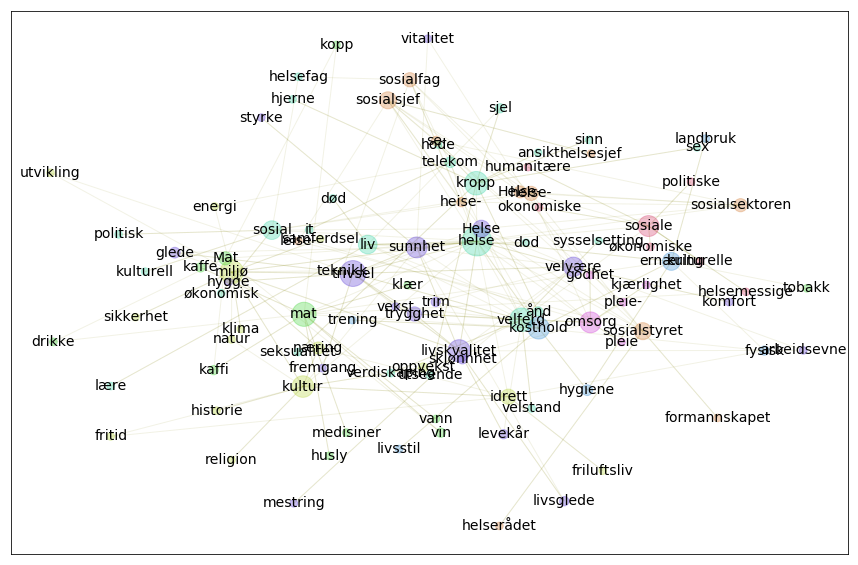

In [48]:
gnl.show_graph(helse, spread=1.8, fontsize=14)

In [49]:
gnl.show_communities(helse)

miljø-kultur :  miljø, kultur, idrett, næring, oppvekst, klima, samferdsel, natur, religion, utvikling, fritid, energi, sikkerhet, historie, teknikk, friluftsliv

mat-Mat :  mat, Mat, vin, kaffe, kaffi, kopp, medisiner, tobakk, drikke, husly, vann, klær

helse-kropp :  helse, kropp, velferd, sosial, liv, telekom, sjel, ånd, utseende, lære, sex, velstand, hjerne, død, helsefag, seksualitet, kulturell, ansikt, sysselsetting, politisk, økonomisk, dod, sinn, it, hode, verdiskaping

kosthold-ernæring :  kosthold, ernæring, hygiene, fysisk, trening, landbruk, livsstil

trivsel-livskvalitet :  trivsel, livskvalitet, sunnhet, velvære, Helse, trygghet, glede, skjønnhet, levekår, livsglede, trim, fremgang, vitalitet, komfort, hygge, mestring, vekst, styrke, arbeidsevne

omsorg-pleie :  omsorg, pleie, kjærlighet, godhet, pleie-

sosiale-helsemessige :  sosiale, helsemessige, humanitære, kulturelle, økonomiske, okonomiske, politiske

sosialsjef-sosialstyret :  sosialsjef, sosialstyret, sosialfag, 

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


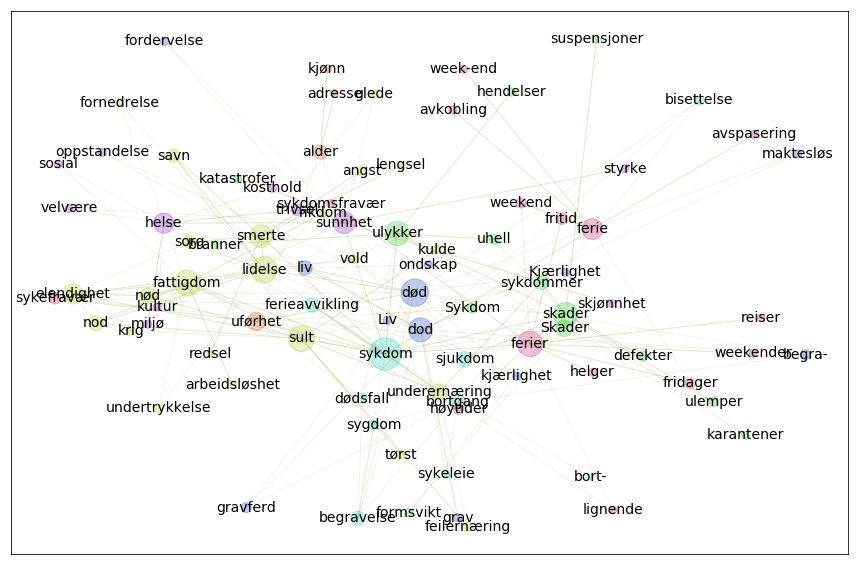

In [50]:
gnl.show_graph(sykdom, spread=1.8, fontsize=14)

In [51]:
lesbe = nb.make_graph('lesbisk', cutoff=18)

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


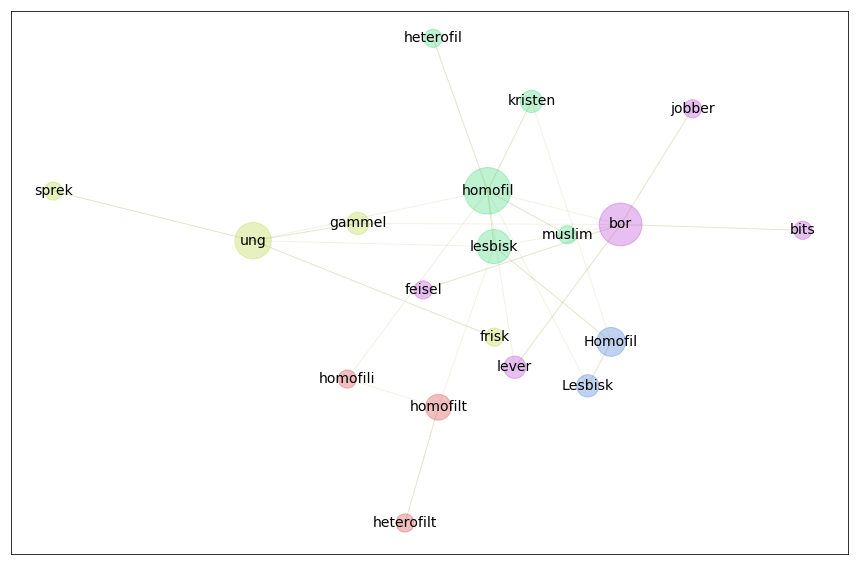

In [52]:
gnl.show_graph(lesbe, spread=1.8, fontsize=14)

In [53]:
gnl.show_communities(lesbe)

ung-gammel :  ung, gammel, sprek, frisk

homofil-lesbisk :  homofil, lesbisk, kristen, muslim, heterofil

Homofil-Lesbisk :  Homofil, Lesbisk

bor-lever :  bor, lever, feisel, bits, jobber

homofilt-homofili :  homofilt, homofili, heterofilt



In [54]:
gnl.show_communities(sykdom)

lidelse-sult :  lidelse, sult, fattigdom, smerte, elendighet, underernæring, nød, nod, sorg, savn, angst, feilernæring, krig, undertrykkelse, arbeidsløshet, rikdom, glede, redsel, lengsel, fornedrelse, kulde, vold, tørst

skader-ulykker :  skader, ulykker, Skader, sykdommer, Sykdom, defekter, ulemper, uhell, hendelser, suspensjoner, karantener, branner, katastrofer, formsvikt

sykdom-bortgang :  sykdom, bortgang, sjukdom, ferieavvikling, begravelse, dødsfall, sygdom, bisettelse, sykeleie, bort-

død-dod :  død, dod, liv, gravferd, begra-, grav, Liv, kjærlighet, fordervelse, ondskap, Kjærlighet, oppstandelse, maktesløs

sunnhet-helse :  sunnhet, helse, trivsel, skjønnhet, velvære, kosthold, styrke, sosial, miljø, kultur

ferier-ferie :  ferier, ferie, fritid, sykefravær, fridager, weekend, høytider, lignende, sykdomsfravær, week-end, avspasering, helger, weekender, reiser, avkobling

uførhet-alder :  uførhet, alder, kjønn, adresse



In [55]:
gnl.show_communities(nb.make_graph('influensa'))

kopper-skåler :  kopper, skåler, tallerkner, glass, sink, tallerkener, fat, asjetter

tuberkulose-meslinger :  tuberkulose, meslinger, diaré, malaria, andre, tyfus, polio, hiv, AIDS, kreft, aids

feber-influensa :  feber, influensa, forkjølelse, hodepine, forkjolelse, hoste, halsonde, halsbetennelse, sår, allergi, bihulebetennelse, kikhoste, omgangssyke, influensa-symptomer, oppkast, smerter, hals, utslett, barnesykdommer, tvinger

vaksine-stamtavle :  vaksine, stamtavle, medisiner, ormekur, attest, vet.attest, chip, helseattest

svineinfluensa-finanskrise :  svineinfluensa, finanskrise, sesonginfluensa, fugleinfluensa

bronkitt-lungebetennelse :  bronkitt, lungebetennelse, hjernehinnebetennelse, forkjølelser, astma, døde

sterk-stabil :  sterk, stabil, smidig, rask, sund, robust, sunn, modig

Forkjølelse-Reumatisme :  Forkjølelse, Reumatisme, Smerter



In [56]:
gnl.show_communities(nb.make_graph('kreft'))

sykdommer-misdannelser :  sykdommer, misdannelser, leukemi, skader, underernæring, lakselus, parasitter, plager, tilstander, infeksjoner, testikkelkreft, skadedyr, ulykker, lidelser, insekter

diabetes-overvekt :  diabetes, overvekt, blodtrykk, kols, revmatisme, høyt, hjerteproblemer, kolesterol, astma, fedme

hjerte--karsykdommer :  hjerte-, karsykdommer, karlidelser, hjerte, psykiske, Hjerte-, karsykdom, lungesykdommer

kosthold-røyking :  kosthold, røyking, Kosthold, helse, alkohol, Helse, trening, ernæring, livsstil, fysisk, snusing, drikking, matvaner, mosjon, trim, aktivitet, hygiene

hjerteinfarkt-lungekreft :  hjerteinfarkt, lungekreft, brystkreft, hjerneslag, slag, kollapser, livmorhalskreft, prostatakreft, døde, blodpropp, stress, strupekreft, angina

kreft-hjertesykdommer :  kreft, hjertesykdommer, hjertesykdom, infeksjonssykdommer, blodsykdommer, indremedisin, hjerte-karsykdommer, lunge-, hjertekarsykdommer, korttid, kvinnehelse, mobilbruk, kreftbehandling, celleforandringe

In [57]:
gnl.show_cliques(nb.make_graph('kreft'))

(3, 1) misdannelser, skader, sykdommer, kreft

(3, 2) alkohol, hiv, leukemi, brystkreft, kolesterol, kosthold, karsykdom, høyt, tuberkulose, røyking, blodtrykk, tobakk, hjerte, helse, revmatisme, hepatitt, overvekt, hjerte-karsykdommer, snus, hjertekarsykdommer, psykiske, lungekreft, HIV, kreft, hjerteinfarkt, hjertesykdommer, malaria, karlidelser, AIDS, andre, hjertesykdom, diabetes, hjerte-, karsykdommer, aids, strupekreft

(4, 1) lungekreft, røyking, andre, blodtrykk, kosthold, kreft, diabetes, hjerteinfarkt, overvekt, hjertesykdommer

(4, 2) AIDS, andre, kreft, tuberkulose, aids

(4, 3) hjerte-, karsykdommer, kreft, diabetes



In [58]:
gnl.community_dict(helse)

{'miljø-kultur': ['miljø',
  'kultur',
  'idrett',
  'næring',
  'oppvekst',
  'klima',
  'samferdsel',
  'natur',
  'religion',
  'utvikling',
  'fritid',
  'energi',
  'sikkerhet',
  'historie',
  'teknikk',
  'friluftsliv'],
 'mat-Mat': ['mat',
  'Mat',
  'vin',
  'kaffe',
  'kaffi',
  'kopp',
  'medisiner',
  'tobakk',
  'drikke',
  'husly',
  'vann',
  'klær'],
 'helse-kropp': ['helse',
  'kropp',
  'velferd',
  'sosial',
  'liv',
  'telekom',
  'sjel',
  'ånd',
  'utseende',
  'lære',
  'sex',
  'velstand',
  'hjerne',
  'død',
  'helsefag',
  'seksualitet',
  'kulturell',
  'ansikt',
  'sysselsetting',
  'politisk',
  'økonomisk',
  'dod',
  'sinn',
  'it',
  'hode',
  'verdiskaping'],
 'kosthold-ernæring': ['kosthold',
  'ernæring',
  'hygiene',
  'fysisk',
  'trening',
  'landbruk',
  'livsstil'],
 'trivsel-livskvalitet': ['trivsel',
  'livskvalitet',
  'sunnhet',
  'velvære',
  'Helse',
  'trygghet',
  'glede',
  'skjønnhet',
  'levekår',
  'livsglede',
  'trim',
  'fremgang'

In [59]:
helse_community =  gnl.community_dict(helse)

In [60]:
from IPython.display import HTML

In [61]:
helse_cluster = dict()
for cluster in helse_community:
    helse_cluster[cluster] = helse_right.loc[helse_community[cluster]].fillna(10).mean()
helse_cluster_time = pd.DataFrame.from_dict(helse_cluster, orient='index')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
helse_cluster_time.style.background_gradient(cmap="Blues_r", axis=1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
helse-kropp,6.66562,6.72835,6.56888,6.23555,6.49206,6.3488,6.72769,6.62198,6.19597,6.19449,6.53615,6.7219,5.89725,5.93435,5.71471,6.34922,6.1805
kosthold-ernæring,6.27439,5.94278,5.07059,5.09627,4.49168,5.1325,4.16111,5.33383,3.95535,3.9885,3.98018,4.4218,4.47471,3.88677,3.54353,3.9346,4.45689
mat-Mat,7.49026,7.26249,6.95487,7.01882,7.31624,7.04914,7.74996,7.58247,6.9207,6.52949,7.7066,7.33322,6.78143,6.42482,7.10832,5.81163,6.09791
miljø-kultur,6.55196,5.98084,5.73098,5.98663,6.13652,5.76401,5.13953,5.61637,5.12196,5.20795,5.38291,4.62533,4.76933,5.02128,5.13461,5.18982,4.94231
omsorg-pleie,7.44926,7.94533,7.4,6.5825,6.48737,5.82183,8.02209,7.33968,7.79921,6.91026,6.82615,6.50269,5.84683,5.57945,4.59359,5.57633,5.43257
sosiale-helsemessige,6.12323,8.20173,6.85274,6.3349,6.35819,5.48936,6.8799,6.1089,5.20495,6.23154,6.15532,7.47438,6.99734,4.84245,5.51381,6.31276,6.97675
sosialsjef-sosialstyret,10,9.2037,9.77083,8.60185,8.40792,8.35394,8.15207,7.4416,7.54324,6.5127,6.26626,5.87641,5.50609,5.56564,6.01623,5.99794,6.33888
trivsel-livskvalitet,5.33662,5.33433,4.9883,5.57022,5.43921,5.10341,5.15516,5.34198,4.84855,5.07564,4.66718,4.65949,5.07605,4.33149,4.80259,4.26478,4.59152


In [63]:
lesbe_community = gnl.community_dict(lesbe)
lesbe_cluster = dict()
for cluster in lesbe_community:
    lesbe_cluster[cluster] = helse_right.loc[lesbe_community[cluster]].fillna(10).mean()
lesbe_cluster_time = pd.DataFrame.from_dict(lesbe_cluster, orient='index')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


In [64]:
lesbe_cluster_time.style.background_gradient(cmap="Blues_r", axis=1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
Homofil-Lesbisk,10,10,10,10,10,10,10,10,10,10,10,7.75,8.375,10,10,10,10
bor-lever,8.65065,7.63897,7.3135,8.70535,8.36965,8.1169,7.33963,7.81374,7.51738,7.91421,8.16755,8.33925,7.92034,8.09152,7.74872,7.25621,6.4398
homofil-lesbisk,10,10,9.1,9.1,9.244,10,10,9,9.1,9.1,9.01667,9.596,8.875,10,9.1,9.1,8.2
homofilt-homofili,10,10,10,10,10,10,10,10,10,10,10,10,10,10,8.5,8.5,9.05556
ung-gammel,5.87222,6.4212,6.58097,6.67095,6.66995,6.3482,5.98688,5.77489,5.69344,6.33363,6.38941,5.73979,5.63319,7.30592,6.66159,6.33036,6.55868


In [65]:
body = ""
for cluster in helse_community:
    
    body += "<h2 style='color:DarkRed'>{c}</h2>".format(c=cluster) + helse_right.loc[helse_community[cluster]].fillna(10).style.background_gradient(cmap="Blues_r", axis=1).render()
css = "<style>td {padding:10px;  border:none;} table {font-family:Arial;}</style>"
html = "{css}{body}".format(css=css, body=body)    

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


In [66]:
HTML(html)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
miljø,4.5,5.5,5.5,5.5,6.5,6.94643,5.19777,2.93462,2.72489,3.99258,3.10585,2.99005,2.98269,2.72907,2.64931,2.47939,2.49543
kultur,5.875,4.64286,5.75,6.22,2.64286,3.75038,3.16667,4.75325,5.72354,5.83393,5.01821,4.8267,5.12422,4.89874,4.70856,4.83518,4.66993
idrett,4.78,4.62,4.5375,4.01648,4.07955,3,5.2,4.25,4.33838,4.9697,6.42763,4.80125,5.10298,4.8125,6.27143,4.52318,4.57213
næring,4.3,4.08333,5.75,5.5,5.5,6,3.75,5.5,5.75,5.5,6.8125,6,4.9,6.17308,5.68838,5.5659,5.64154
oppvekst,10,10,5.5,5.5,10,10,10,10,4.05556,10,5,4.1875,5.5,6.38,5.91758,5.33908,5.0788
klima,6.5,5.5,5.5,5.91667,6.8125,7.98571,4.5,6.25,10,3.75,7.16667,6.625,5.25,4.42063,5.42857,5.5,4.58163
samferdsel,10,10,10,10,10,5.5,5.61111,6.25,4.04167,4.16667,4.96429,4.18152,4.47062,4.86413,4.03219,4.82049,4.96773
natur,4.72222,6.16667,5.5,10,6.85417,3.625,4.69617,5.25758,3.64286,5.6875,4.52778,2.60956,3.56171,3.15046,3.76165,4.49459,5.85648
religion,10,10,10,5.5,10,10,5.25,5.5,5.5,6,5.5,4.34444,4.75,8.27778,6.0625,5.36111,4.47917


In [67]:
with open('helse_galakse.html', 'w') as f:
    f.write(html)

In [90]:
helse_right[:5]

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
!,5.629124,5.489265,4.879627,5.071042,5.428748,4.930803,5.865653,5.601454,5.457031,5.519574,5.508545,5.588055,5.780306,5.437470,5.181603,5.563250,5.400416
"""",5.552370,6.151109,5.442479,6.646479,6.330409,6.098752,5.282693,5.532262,5.101565,5.538586,5.858564,6.011529,5.598438,5.258563,5.331346,4.789660,4.880983
#,4.166667,4.477273,5.288462,6.575617,6.636364,5.007812,5.471480,5.743056,6.722222,7.362637,4.537500,5.346154,5.362745,5.118182,5.450087,5.555831,5.113158
$,5.500000,7.000000,6.541667,6.769841,6.611111,5.569136,5.830000,6.775000,6.080808,6.250000,5.166667,5.500000,4.333333,4.583333,7.500000,5.500000,5.361111
%,6.843434,6.246667,5.317407,5.570994,6.852273,6.829411,6.796296,6.695246,6.762037,7.013158,5.547826,7.161957,6.687354,5.343265,6.490541,7.627022,6.607576


In [128]:
helse_grouped = pd.DataFrame({str((i/4+5)*10) + "'s":helse_right.loc["sosial økonomi kultur".split()].iloc[:,i:i + 4].mean(axis=1) for i in range(0,17,4)})

In [129]:
helse_grouped.style.background_gradient(cmap="Blues_r", axis=1)

,50.0's,60.0's,70.0's,80.0's,90.0's
sosial,4.63352,4.20556,2.90195,2.3246,2.26961
økonomi,3.47585,3.38421,4.24809,4.35286,4.91878
kultur,5.62196,3.57829,5.3506,4.89168,4.66993


In [74]:
helse_right.loc["sosial økonomi kultur".split()].fillna(10).style.background_gradient(cmap="Blues_r", axis=1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
sosial,6.125,3.27143,4.275,4.86264,3.94643,4.66667,4.5713,3.63785,3.20167,3.43651,2.44968,2.51995,2.38614,2.27893,2.37563,2.25771,2.26961
økonomi,3.56096,3.36865,3.20635,3.76743,2.89959,3.77683,3.56353,3.2969,3.99589,4.1243,4.46405,4.40812,4.59735,3.8873,4.49037,4.43642,4.91878
kultur,5.875,4.64286,5.75,6.22,2.64286,3.75038,3.16667,4.75325,5.72354,5.83393,5.01821,4.8267,5.12422,4.89874,4.70856,4.83518,4.66993


In [75]:
helse_right.loc["sosiale økonomiske kulturelle".split()].fillna(10).style.background_gradient(cmap="Blues_r", axis=1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
sosiale,5.39038,5.5642,5.60185,5.51,5.15992,5.3569,4.63225,5.19677,4.73042,3.7592,3.46342,3.0157,3.35141,3.39137,3.09196,3.72502,3.24369
økonomiske,7.27778,6.68125,5.43878,6.75216,6.95455,6.38112,6.92917,5.10676,5.15054,6.25838,7.20852,6.1085,7.48933,6.05596,6.33903,6.48057,5.91453
kulturelle,5.5,10,6,5.17188,7.25,5.5,10,5.5,5.5,5.5,5,7.125,5.25,3.92857,5.5,7.2,7.91667


In [76]:
helse_right.loc[". , ! ?".split()].fillna(10).style.background_gradient(cmap="Blues_r", axis=1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
.,4.52456,4.45494,4.62272,4.6284,4.81822,4.87703,4.90422,4.37783,4.4874,4.75618,4.63605,4.37485,4.56685,5.23341,5.09927,4.9854,5.11049
",",4.61209,4.59949,4.48419,4.28224,4.19856,4.33844,4.32039,4.3835,4.66247,4.25658,4.42896,4.40327,4.1536,4.19873,4.18469,4.0003,3.88286
!,5.62912,5.48927,4.87963,5.07104,5.42875,4.9308,5.86565,5.60145,5.45703,5.51957,5.50854,5.58806,5.78031,5.43747,5.1816,5.56325,5.40042
?,4.4212,4.57428,5.81083,4.61405,4.7329,4.74673,4.31158,4.59338,4.81745,3.97984,4.2632,4.51103,4.3213,4.53293,4.42772,5.27083,5.56514
